In [3]:
import logging
import os
import pandas as pd
from tqdm import tqdm
PROCESSED_PATH = "../.data/processed"

In [4]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(name)s | %(message)s",
    handlers=[logging.StreamHandler()]
)

logger = logging.getLogger(__name__)

In [6]:
DATA_PATH = "../.data/processed/user_features.parquet"

In [7]:
df = pd.read_parquet(DATA_PATH)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15639803 entries, 0 to 15639802
Data columns (total 13 columns):
 #   Column              Dtype              
---  ------              -----              
 0   user_id             int64              
 1   count_view          int64              
 2   count_cart          int64              
 3   count_purchase      int64              
 4   unique_sessions     int64              
 5   active_days         int64              
 6   recency_days        int64              
 7   total_spent         float64            
 8   avg_purchase_price  float64            
 9   first_event         datetime64[ns, UTC]
 10  last_event          datetime64[ns, UTC]
 11  fav_main_category   object             
 12  fav_sub_category    object             
dtypes: datetime64[ns, UTC](2), float64(2), int64(7), object(2)
memory usage: 1.5+ GB


In [9]:
df.describe()

,user_id,count_view,count_cart,count_purchase,unique_sessions,active_days,recency_days,total_spent,avg_purchase_price
count,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07
mean,5.825121e+08,2.466443e+01,1.222142e+00,4.379099e-01,5.784033e+00,3.862482e+00,4.393321e+00,1.315520e+02,2.003042e+01
std,4.000711e+07,1.087562e+02,5.693922e+00,3.164790e+00,5.629168e+01,6.607303e+00,4.418245e+00,1.378567e+03,9.205336e+01
min,1.030022e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.528027e+08,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.862203e+08,4.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
75%,6.151136e+08,1.700000e+01,0.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00
max,6.497760e+08,1.991750e+05,2.342000e+03,2.120000e+03,1.306690e+05,2.170000e+02,2.100000e+01,7.901209e+05,2.574070e+03


In [10]:
print(df.isnull().sum())

user_id               0
count_view            0
count_cart            0
count_purchase        0
unique_sessions       0
active_days           0
recency_days          0
total_spent           0
avg_purchase_price    0
first_event           0
last_event            0
fav_main_category     0
fav_sub_category      0
dtype: int64


In [11]:
df["user_id"].nunique()

15639803

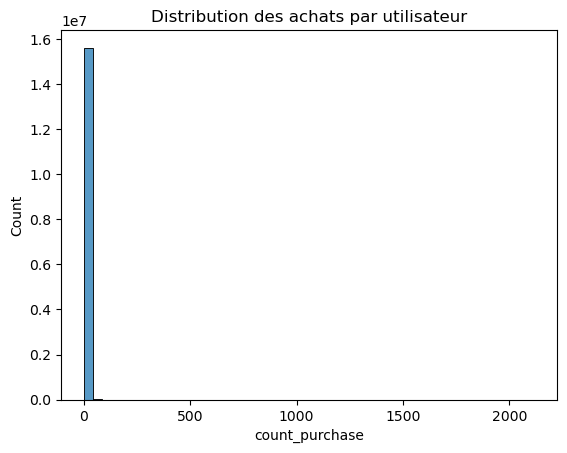

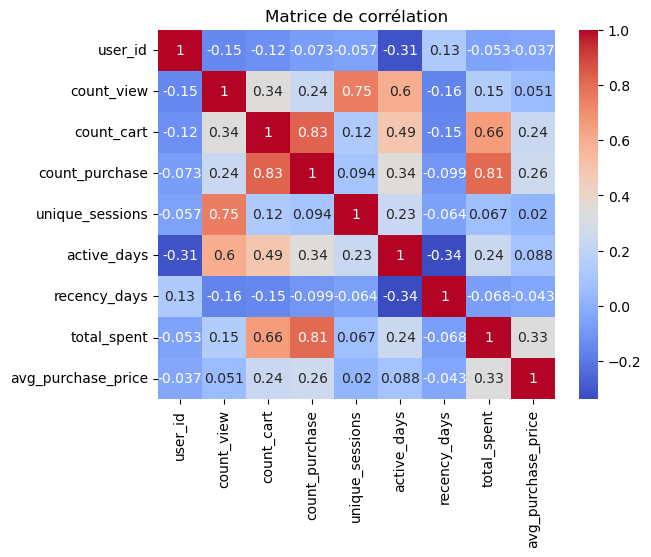

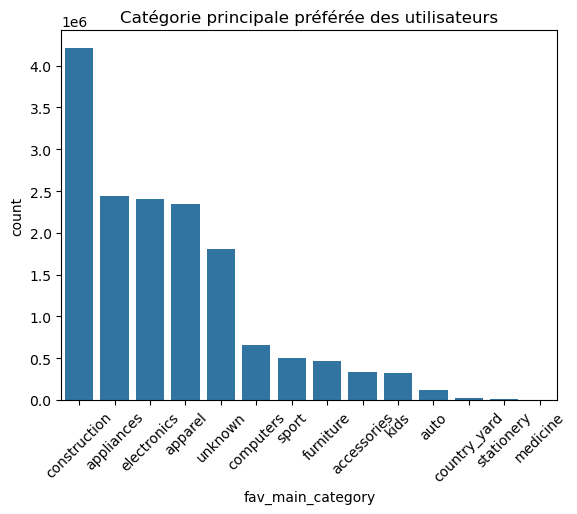

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution des variables continues
sns.histplot(df['count_purchase'], bins=50)
plt.title("Distribution des achats par utilisateur")
plt.show()

# 2. Corrélation entre les features numériques
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# 3. Nombre de clients par fav_main_category
sns.countplot(data=df, x='fav_main_category',
              order=df['fav_main_category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Catégorie principale préférée des utilisateurs")
plt.show()

In [14]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cat = encoder.fit_transform(
    df[['fav_main_category', 'fav_sub_category']])
encoded_df = pd.DataFrame(
    encoded_cat, columns=encoder.get_feature_names_out(), index=df.index)

df_final = pd.concat(
    [df.drop(['fav_main_category', 'fav_sub_category', 'first_event', 'last_event'], axis=1),
     encoded_df],§
    axis=1
)

KeyboardInterrupt: 